In [1]:
!pip install tensorflow
!pip install keras

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
data = pd.read_csv("C:/Users/rabhi/OneDrive/Documents/Downloads/archive/creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# 🔍 Exploratory Data Analysis


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
pd.set_option("display.float", "{:.2f}".format)
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,...,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,94813.86,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,...,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35,0.00
std,47488.15,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,...,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,...,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,54201.50,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,...,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,84692.00,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,...,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,139320.50,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,...,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,172792.00,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,...,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00


Let us now check the missing values in the dataset


In [5]:
data.isnull().sum().sum()

0

In [6]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

### The only non-transformed variables to work with are:

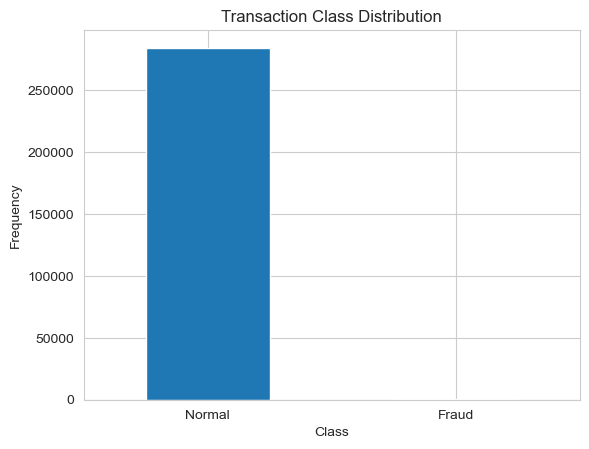

In [7]:
LABELS = ["Normal", "Fraud"]

count_classes = pd.value_counts(data['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

In [8]:
data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [9]:
fraud = data[data['Class']==1]
normal = data[data['Class']==0]

print(f"Shape of Fraudulant transactions: {fraud.shape}")
print(f"Shape of Non-Fraudulant transactions: {normal.shape}")

Shape of Fraudulant transactions: (492, 31)
Shape of Non-Fraudulant transactions: (284315, 31)


How different are the amount of money used in different transaction classes?

In [10]:
pd.concat([fraud.Amount.describe(), normal.Amount.describe()], axis=1)

,Amount,Amount
count,492.00,284315.00
mean,122.21,88.29
std,256.68,250.11
min,0.00,0.00
25%,1.00,5.65
50%,9.25,22.00
75%,105.89,77.05
max,2125.87,25691.16


Do fraudulent transactions occur more often during certain time frame ?

In [11]:
pd.concat([fraud.Time.describe(), normal.Time.describe()], axis=1)

,Time,Time
count,492.00,284315.00
mean,80746.81,94838.20
std,47835.37,47484.02
min,406.00,0.00
25%,41241.50,54230.00
50%,75568.50,84711.00
75%,128483.00,139333.00
max,170348.00,172792.00


C:\Users\rabhi\AppData\Local\Temp\ipykernel_5852\3161143837.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 2)


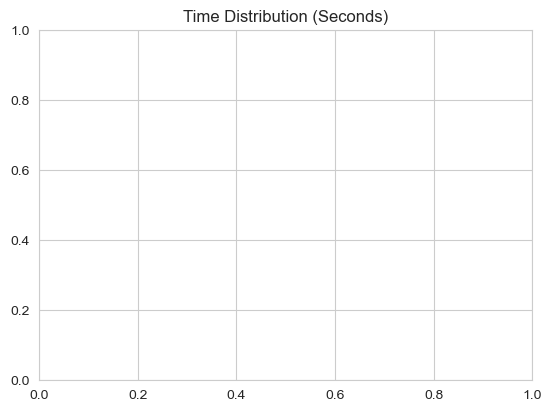

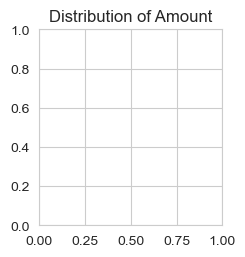

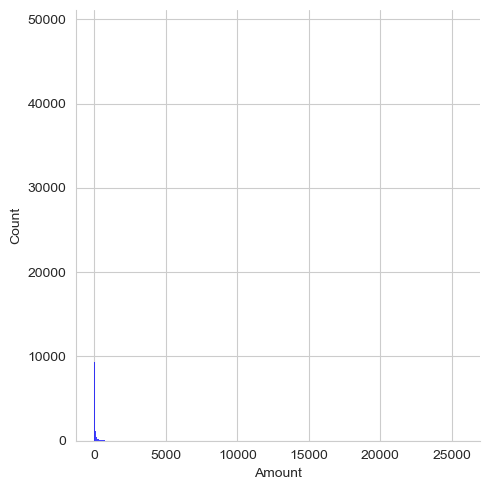

In [12]:
# plot the time feature
plt.figure(figsize=(14,10))

plt.subplot(2, 2, 1)
plt.title('Time Distribution (Seconds)')

sns.displot(data['Time'], color='blue');

#plot the amount feature
plt.subplot(2, 2, 2)
plt.title('Distribution of Amount')
sns.displot(data['Amount'],color='blue');

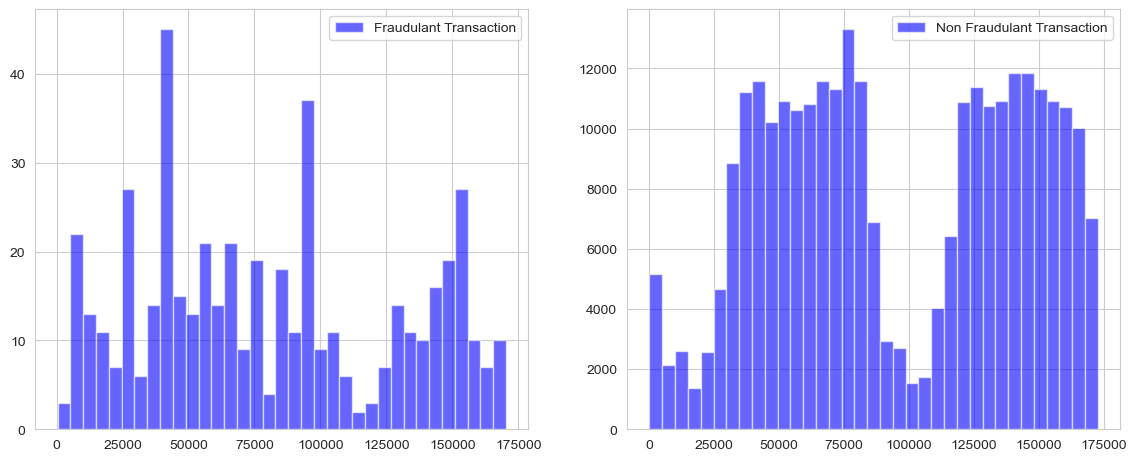

In [13]:
# data[data.Class == 0].Time.hist(bins=35, color='blue', alpha=0.6)
plt.figure(figsize=(14, 12))

plt.subplot(2, 2, 1)
data[data.Class == 1].Time.hist(bins=35, color='blue', alpha=0.6, label="Fraudulant Transaction")
plt.legend()

plt.subplot(2, 2, 2)
data[data.Class == 0].Time.hist(bins=35, color='blue', alpha=0.6, label="Non Fraudulant Transaction")
plt.legend()

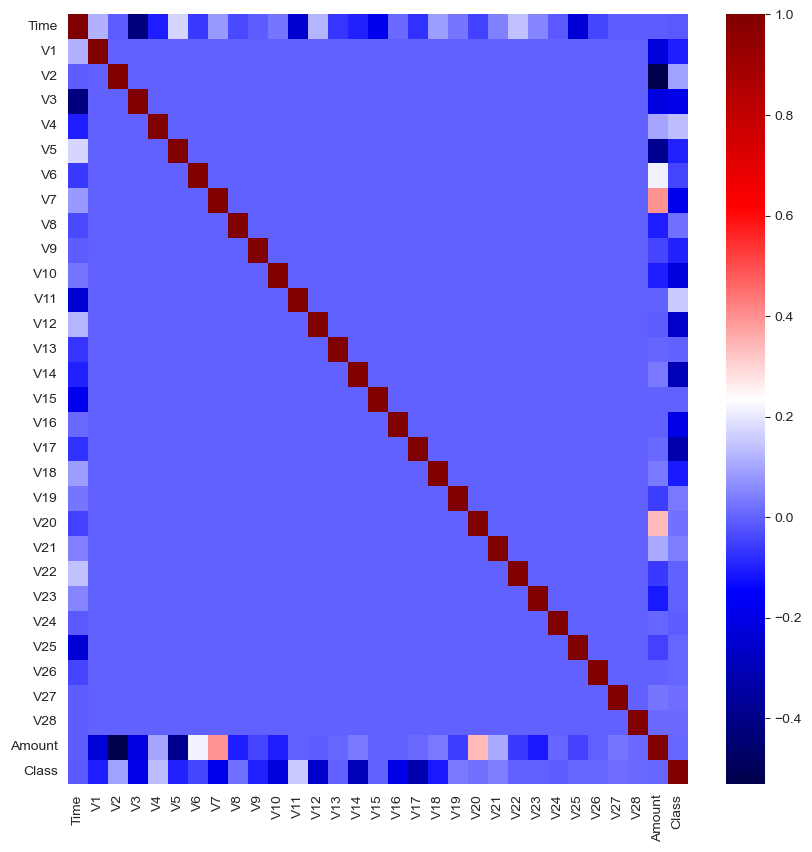

In [14]:
# heatmap to find any high correlations

plt.figure(figsize=(10,10))
sns.heatmap(data=data.corr(), cmap="seismic")
plt.show();

### Highest correlations come from:

# 3. Data Pre-processing

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

X = data.drop('Class', axis=1)
y = data.Class

X_train_v, X_test, y_train_v, y_test = train_test_split(X, y, 
                                                    test_size=0.3, random_state=42)
X_train, X_validate, y_train, y_validate = train_test_split(X_train_v, y_train_v, 
                                                            test_size=0.2, random_state=42)

X_train = scalar.fit_transform(X_train)
X_validate = scalar.transform(X_validate)
X_test = scalar.transform(X_test)

w_p = y_train.value_counts()[0] / len(y_train)
w_n = y_train.value_counts()[1] / len(y_train)

print(f"Fraudulant transaction weight: {w_n}")
print(f"Non-Fraudulant transaction weight: {w_p}")

Fraudulant transaction weight: 0.0017994745785028623
Non-Fraudulant transaction weight: 0.9982005254214972


In [16]:
print(f"TRAINING: X_train: {X_train.shape}, y_train: {y_train.shape}\n{'_'*55}")
print(f"VALIDATION: X_validate: {X_validate.shape}, y_validate: {y_validate.shape}\n{'_'*50}")
print(f"TESTING: X_test: {X_test.shape}, y_test: {y_test.shape}")

TRAINING: X_train: (159491, 30), y_train: (159491,)
_______________________________________________________
VALIDATION: X_validate: (39873, 30), y_validate: (39873,)
__________________________________________________
TESTING: X_test: (85443, 30), y_test: (85443,)


In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

def print_score(label, prediction, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, prediction)}\n")
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(label, prediction)}\n") 

# 4. Model Building
# 4. 1. Artificial Neural Network (ANNs)

In [18]:

from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[-1],)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation='sigmoid'),
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               7936      
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 256)               0

In [23]:
METRICS = [
#     keras.metrics.Accuracy(name='accuracy'),
    keras.metrics.FalseNegatives(name='fn'),
    keras.metrics.FalsePositives(name='fp'),
    keras.metrics.TrueNegatives(name='tn'),
    keras.metrics.TruePositives(name='tp'),
    keras.metrics.Precision(name='precision'),
    keras.metrics.Recall(name='recall')
]

model.compile(optimizer=keras.optimizers.Adam(1e-4), loss='binary_crossentropy', metrics=METRICS)

callbacks = [keras.callbacks.ModelCheckpoint('fraud_model_at_epoch_{epoch}.h5')]
class_weight = {0:w_p, 1:w_n}

r = model.fit(
    X_train, y_train, 
    validation_data=(X_validate, y_validate),
    batch_size=2048, 
    epochs=300, 
#     class_weight=class_weight,
    callbacks=callbacks,
)

Epoch 1/300
78/78 [==============================] - 8s 75ms/step - loss: 0.0038 - fn: 77.0000 - fp: 20.0000 - tn: 159184.0000 - tp: 210.0000 - precision: 0.9130 - recall: 0.7317 - val_loss: 0.0047 - val_fn: 17.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 52.0000 - val_precision: 0.8667 - val_recall: 0.7536
Epoch 2/300
78/78 [==============================] - 5s 66ms/step - loss: 0.0042 - fn: 84.0000 - fp: 24.0000 - tn: 159180.0000 - tp: 203.0000 - precision: 0.8943 - recall: 0.7073 - val_loss: 0.0050 - val_fn: 16.0000 - val_fp: 10.0000 - val_tn: 39794.0000 - val_tp: 53.0000 - val_precision: 0.8413 - val_recall: 0.7681
Epoch 3/300
78/78 [==============================] - 5s 68ms/step - loss: 0.0034 - fn: 76.0000 - fp: 17.0000 - tn: 159187.0000 - tp: 211.0000 - precision: 0.9254 - recall: 0.7352 - val_loss: 0.0051 - val_fn: 16.0000 - val_fp: 10.0000 - val_tn: 39794.0000 - val_tp: 53.0000 - val_precision: 0.8413 - val_recall: 0.7681
Epoch 4/300
78/78 [============================

Epoch 27/300
78/78 [==============================] - 5s 70ms/step - loss: 0.0026 - fn: 66.0000 - fp: 21.0000 - tn: 159183.0000 - tp: 221.0000 - precision: 0.9132 - recall: 0.7700 - val_loss: 0.0047 - val_fn: 17.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 52.0000 - val_precision: 0.8667 - val_recall: 0.7536
Epoch 28/300
78/78 [==============================] - 5s 67ms/step - loss: 0.0028 - fn: 73.0000 - fp: 21.0000 - tn: 159183.0000 - tp: 214.0000 - precision: 0.9106 - recall: 0.7456 - val_loss: 0.0047 - val_fn: 17.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 52.0000 - val_precision: 0.8814 - val_recall: 0.7536
Epoch 29/300
78/78 [==============================] - 5s 68ms/step - loss: 0.0024 - fn: 68.0000 - fp: 15.0000 - tn: 159189.0000 - tp: 219.0000 - precision: 0.9359 - recall: 0.7631 - val_loss: 0.0048 - val_fn: 16.0000 - val_fp: 9.0000 - val_tn: 39795.0000 - val_tp: 53.0000 - val_precision: 0.8548 - val_recall: 0.7681
Epoch 30/300
78/78 [==========================

Epoch 53/300
78/78 [==============================] - 4s 56ms/step - loss: 0.0021 - fn: 57.0000 - fp: 19.0000 - tn: 159185.0000 - tp: 230.0000 - precision: 0.9237 - recall: 0.8014 - val_loss: 0.0047 - val_fn: 13.0000 - val_fp: 9.0000 - val_tn: 39795.0000 - val_tp: 56.0000 - val_precision: 0.8615 - val_recall: 0.8116
Epoch 54/300
78/78 [==============================] - 5s 58ms/step - loss: 0.0023 - fn: 59.0000 - fp: 15.0000 - tn: 159189.0000 - tp: 228.0000 - precision: 0.9383 - recall: 0.7944 - val_loss: 0.0048 - val_fn: 15.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 54.0000 - val_precision: 0.8852 - val_recall: 0.7826
Epoch 55/300
78/78 [==============================] - 4s 53ms/step - loss: 0.0020 - fn: 60.0000 - fp: 17.0000 - tn: 159187.0000 - tp: 227.0000 - precision: 0.9303 - recall: 0.7909 - val_loss: 0.0049 - val_fn: 14.0000 - val_fp: 9.0000 - val_tn: 39795.0000 - val_tp: 55.0000 - val_precision: 0.8594 - val_recall: 0.7971
Epoch 56/300
78/78 [==========================

Epoch 79/300
78/78 [==============================] - 5s 59ms/step - loss: 0.0017 - fn: 50.0000 - fp: 16.0000 - tn: 159188.0000 - tp: 237.0000 - precision: 0.9368 - recall: 0.8258 - val_loss: 0.0055 - val_fn: 13.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 56.0000 - val_precision: 0.8750 - val_recall: 0.8116
Epoch 80/300
78/78 [==============================] - 4s 55ms/step - loss: 0.0018 - fn: 50.0000 - fp: 14.0000 - tn: 159190.0000 - tp: 237.0000 - precision: 0.9442 - recall: 0.8258 - val_loss: 0.0054 - val_fn: 13.0000 - val_fp: 9.0000 - val_tn: 39795.0000 - val_tp: 56.0000 - val_precision: 0.8615 - val_recall: 0.8116
Epoch 81/300
78/78 [==============================] - 9s 113ms/step - loss: 0.0019 - fn: 52.0000 - fp: 17.0000 - tn: 159187.0000 - tp: 235.0000 - precision: 0.9325 - recall: 0.8188 - val_loss: 0.0053 - val_fn: 13.0000 - val_fp: 9.0000 - val_tn: 39795.0000 - val_tp: 56.0000 - val_precision: 0.8615 - val_recall: 0.8116
Epoch 82/300
78/78 [=========================

Epoch 105/300
78/78 [==============================] - 6s 75ms/step - loss: 0.0016 - fn: 47.0000 - fp: 16.0000 - tn: 159188.0000 - tp: 240.0000 - precision: 0.9375 - recall: 0.8362 - val_loss: 0.0055 - val_fn: 13.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 56.0000 - val_precision: 0.8889 - val_recall: 0.8116
Epoch 106/300
78/78 [==============================] - 5s 63ms/step - loss: 0.0015 - fn: 45.0000 - fp: 10.0000 - tn: 159194.0000 - tp: 242.0000 - precision: 0.9603 - recall: 0.8432 - val_loss: 0.0053 - val_fn: 13.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 56.0000 - val_precision: 0.8889 - val_recall: 0.8116
Epoch 107/300
78/78 [==============================] - 5s 59ms/step - loss: 0.0016 - fn: 49.0000 - fp: 18.0000 - tn: 159186.0000 - tp: 238.0000 - precision: 0.9297 - recall: 0.8293 - val_loss: 0.0053 - val_fn: 13.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 56.0000 - val_precision: 0.8889 - val_recall: 0.8116
Epoch 108/300
78/78 [======================

Epoch 131/300
78/78 [==============================] - 6s 71ms/step - loss: 0.0013 - fn: 42.0000 - fp: 12.0000 - tn: 159192.0000 - tp: 245.0000 - precision: 0.9533 - recall: 0.8537 - val_loss: 0.0058 - val_fn: 13.0000 - val_fp: 6.0000 - val_tn: 39798.0000 - val_tp: 56.0000 - val_precision: 0.9032 - val_recall: 0.8116
Epoch 132/300
78/78 [==============================] - 6s 74ms/step - loss: 0.0012 - fn: 39.0000 - fp: 15.0000 - tn: 159189.0000 - tp: 248.0000 - precision: 0.9430 - recall: 0.8641 - val_loss: 0.0059 - val_fn: 13.0000 - val_fp: 6.0000 - val_tn: 39798.0000 - val_tp: 56.0000 - val_precision: 0.9032 - val_recall: 0.8116
Epoch 133/300
78/78 [==============================] - 6s 75ms/step - loss: 0.0012 - fn: 42.0000 - fp: 10.0000 - tn: 159194.0000 - tp: 245.0000 - precision: 0.9608 - recall: 0.8537 - val_loss: 0.0058 - val_fn: 14.0000 - val_fp: 5.0000 - val_tn: 39799.0000 - val_tp: 55.0000 - val_precision: 0.9167 - val_recall: 0.7971
Epoch 134/300
78/78 [======================

Epoch 157/300
78/78 [==============================] - 4s 54ms/step - loss: 0.0012 - fn: 35.0000 - fp: 15.0000 - tn: 159189.0000 - tp: 252.0000 - precision: 0.9438 - recall: 0.8780 - val_loss: 0.0060 - val_fn: 13.0000 - val_fp: 6.0000 - val_tn: 39798.0000 - val_tp: 56.0000 - val_precision: 0.9032 - val_recall: 0.8116
Epoch 158/300
78/78 [==============================] - 4s 54ms/step - loss: 0.0010 - fn: 39.0000 - fp: 13.0000 - tn: 159191.0000 - tp: 248.0000 - precision: 0.9502 - recall: 0.8641 - val_loss: 0.0062 - val_fn: 13.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 56.0000 - val_precision: 0.8889 - val_recall: 0.8116
Epoch 159/300
78/78 [==============================] - 4s 55ms/step - loss: 9.5205e-04 - fn: 33.0000 - fp: 8.0000 - tn: 159196.0000 - tp: 254.0000 - precision: 0.9695 - recall: 0.8850 - val_loss: 0.0060 - val_fn: 13.0000 - val_fp: 6.0000 - val_tn: 39798.0000 - val_tp: 56.0000 - val_precision: 0.9032 - val_recall: 0.8116
Epoch 160/300
78/78 [===================

78/78 [==============================] - 5s 59ms/step - loss: 9.6826e-04 - fn: 33.0000 - fp: 7.0000 - tn: 159197.0000 - tp: 254.0000 - precision: 0.9732 - recall: 0.8850 - val_loss: 0.0062 - val_fn: 14.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 55.0000 - val_precision: 0.8730 - val_recall: 0.7971
Epoch 183/300
78/78 [==============================] - 5s 61ms/step - loss: 9.6301e-04 - fn: 34.0000 - fp: 12.0000 - tn: 159192.0000 - tp: 253.0000 - precision: 0.9547 - recall: 0.8815 - val_loss: 0.0063 - val_fn: 14.0000 - val_fp: 9.0000 - val_tn: 39795.0000 - val_tp: 55.0000 - val_precision: 0.8594 - val_recall: 0.7971
Epoch 184/300
78/78 [==============================] - 4s 54ms/step - loss: 9.4479e-04 - fn: 37.0000 - fp: 12.0000 - tn: 159192.0000 - tp: 250.0000 - precision: 0.9542 - recall: 0.8711 - val_loss: 0.0065 - val_fn: 13.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 56.0000 - val_precision: 0.8750 - val_recall: 0.8116
Epoch 185/300
78/78 [=========================

78/78 [==============================] - 5s 64ms/step - loss: 7.7511e-04 - fn: 26.0000 - fp: 8.0000 - tn: 159196.0000 - tp: 261.0000 - precision: 0.9703 - recall: 0.9094 - val_loss: 0.0063 - val_fn: 13.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 56.0000 - val_precision: 0.8889 - val_recall: 0.8116
Epoch 208/300
78/78 [==============================] - 5s 67ms/step - loss: 8.7708e-04 - fn: 29.0000 - fp: 10.0000 - tn: 159194.0000 - tp: 258.0000 - precision: 0.9627 - recall: 0.8990 - val_loss: 0.0063 - val_fn: 14.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 55.0000 - val_precision: 0.8871 - val_recall: 0.7971
Epoch 209/300
78/78 [==============================] - 5s 65ms/step - loss: 7.4696e-04 - fn: 27.0000 - fp: 7.0000 - tn: 159197.0000 - tp: 260.0000 - precision: 0.9738 - recall: 0.9059 - val_loss: 0.0064 - val_fn: 13.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 56.0000 - val_precision: 0.8750 - val_recall: 0.8116
Epoch 210/300
78/78 [==========================

78/78 [==============================] - 4s 57ms/step - loss: 7.8205e-04 - fn: 29.0000 - fp: 11.0000 - tn: 159193.0000 - tp: 258.0000 - precision: 0.9591 - recall: 0.8990 - val_loss: 0.0067 - val_fn: 13.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 56.0000 - val_precision: 0.8750 - val_recall: 0.8116
Epoch 233/300
78/78 [==============================] - 5s 59ms/step - loss: 7.8501e-04 - fn: 24.0000 - fp: 7.0000 - tn: 159197.0000 - tp: 263.0000 - precision: 0.9741 - recall: 0.9164 - val_loss: 0.0066 - val_fn: 13.0000 - val_fp: 6.0000 - val_tn: 39798.0000 - val_tp: 56.0000 - val_precision: 0.9032 - val_recall: 0.8116
Epoch 234/300
78/78 [==============================] - 4s 53ms/step - loss: 8.6464e-04 - fn: 29.0000 - fp: 13.0000 - tn: 159191.0000 - tp: 258.0000 - precision: 0.9520 - recall: 0.8990 - val_loss: 0.0066 - val_fn: 13.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 56.0000 - val_precision: 0.8750 - val_recall: 0.8116
Epoch 235/300
78/78 [=========================

78/78 [==============================] - 5s 64ms/step - loss: 5.4519e-04 - fn: 21.0000 - fp: 7.0000 - tn: 159197.0000 - tp: 266.0000 - precision: 0.9744 - recall: 0.9268 - val_loss: 0.0069 - val_fn: 13.0000 - val_fp: 9.0000 - val_tn: 39795.0000 - val_tp: 56.0000 - val_precision: 0.8615 - val_recall: 0.8116
Epoch 258/300
78/78 [==============================] - 5s 65ms/step - loss: 6.4495e-04 - fn: 26.0000 - fp: 9.0000 - tn: 159195.0000 - tp: 261.0000 - precision: 0.9667 - recall: 0.9094 - val_loss: 0.0070 - val_fn: 13.0000 - val_fp: 10.0000 - val_tn: 39794.0000 - val_tp: 56.0000 - val_precision: 0.8485 - val_recall: 0.8116
Epoch 259/300
78/78 [==============================] - 5s 68ms/step - loss: 6.0248e-04 - fn: 18.0000 - fp: 8.0000 - tn: 159196.0000 - tp: 269.0000 - precision: 0.9711 - recall: 0.9373 - val_loss: 0.0069 - val_fn: 13.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 56.0000 - val_precision: 0.8889 - val_recall: 0.8116
Epoch 260/300
78/78 [==========================

78/78 [==============================] - 9s 113ms/step - loss: 4.0715e-04 - fn: 18.0000 - fp: 2.0000 - tn: 159202.0000 - tp: 269.0000 - precision: 0.9926 - recall: 0.9373 - val_loss: 0.0073 - val_fn: 13.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 56.0000 - val_precision: 0.8750 - val_recall: 0.8116
Epoch 283/300
78/78 [==============================] - 9s 111ms/step - loss: 5.9705e-04 - fn: 16.0000 - fp: 9.0000 - tn: 159195.0000 - tp: 271.0000 - precision: 0.9679 - recall: 0.9443 - val_loss: 0.0071 - val_fn: 13.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 56.0000 - val_precision: 0.8750 - val_recall: 0.8116
Epoch 284/300
78/78 [==============================] - 9s 111ms/step - loss: 5.4527e-04 - fn: 21.0000 - fp: 7.0000 - tn: 159197.0000 - tp: 266.0000 - precision: 0.9744 - recall: 0.9268 - val_loss: 0.0072 - val_fn: 13.0000 - val_fp: 9.0000 - val_tn: 39795.0000 - val_tp: 56.0000 - val_precision: 0.8615 - val_recall: 0.8116
Epoch 285/300
78/78 [========================

In [24]:
score = model.evaluate(X_test, y_test)
print(score)

2671/2671 [==============================] - 13s 5ms/step - loss: 0.0040 - fn: 26.0000 - fp: 12.0000 - tn: 85295.0000 - tp: 110.0000 - precision: 0.9016 - recall: 0.8088
[0.004014603327959776, 26.0, 12.0, 85295.0, 110.0, 0.9016393423080444, 0.8088235259056091]


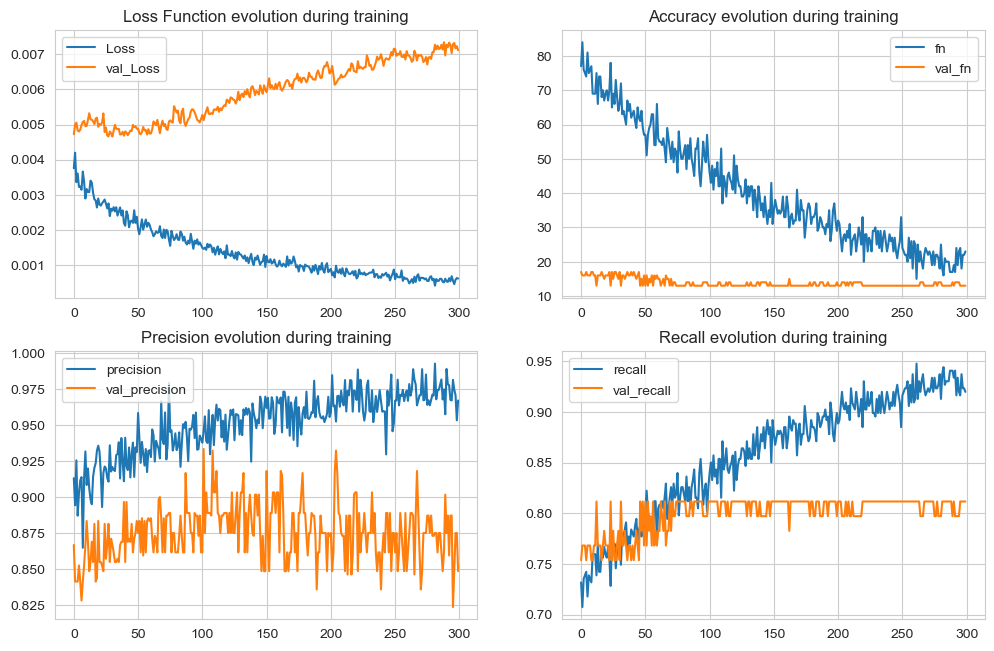

In [25]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.title('Loss Function evolution during training')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(r.history['fn'], label='fn')
plt.plot(r.history['val_fn'], label='val_fn')
plt.title('Accuracy evolution during training')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(r.history['precision'], label='precision')
plt.plot(r.history['val_precision'], label='val_precision')
plt.title('Precision evolution during training')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(r.history['recall'], label='recall')
plt.plot(r.history['val_recall'], label='val_recall')
plt.title('Recall evolution during training')
plt.legend()

In [26]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print_score(y_train, y_train_pred.round(), train=True)
print_score(y_test, y_test_pred.round(), train=False)

scores_dict = {
    'ANNs': {
        'Train': f1_score(y_train, y_train_pred.round()),
        'Test': f1_score(y_test, y_test_pred.round()),
    },
}

2671/2671 [==============================] - 11s 4ms/step
Train Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:
                  0      1  accuracy  macro avg  weighted avg
precision      1.00   1.00      1.00       1.00          1.00
recall         1.00   0.98      1.00       0.99          1.00
f1-score       1.00   0.99      1.00       0.99          1.00
support   159204.00 287.00      1.00  159491.00     159491.00
_______________________________________________
Confusion Matrix: 
 [[159204      0]
 [     6    281]]

Test Result:
Accuracy Score: 99.96%
_______________________________________________
Classification Report:
                 0      1  accuracy  macro avg  weighted avg
precision     1.00   0.90      1.00       0.95          1.00
recall        1.00   0.81      1.00       0.90          1.00
f1-score      1.00   0.85      1.00       0.93          1.00
support   85307.00 136.00      1.00   85443.00      85443.00
_______

# 4. 2. XGBoost

In [31]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [32]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train, eval_metric='aucpr')

y_train_pred = xgb_clf.predict(X_train)
y_test_pred = xgb_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

scores_dict['XGBoost'] = {
        'Train': f1_score(y_train,y_train_pred),
        'Test': f1_score(y_test, y_test_pred),
}

C:\Users\rabhi\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


Train Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:
                  0      1  accuracy  macro avg  weighted avg
precision      1.00   1.00      1.00       1.00          1.00
recall         1.00   1.00      1.00       1.00          1.00
f1-score       1.00   1.00      1.00       1.00          1.00
support   159204.00 287.00      1.00  159491.00     159491.00
_______________________________________________
Confusion Matrix: 
 [[159204      0]
 [     0    287]]

Test Result:
Accuracy Score: 99.96%
_______________________________________________
Classification Report:
                 0      1  accuracy  macro avg  weighted avg
precision     1.00   0.95      1.00       0.97          1.00
recall        1.00   0.82      1.00       0.91          1.00
f1-score      1.00   0.88      1.00       0.94          1.00
support   85307.00 136.00      1.00   85443.00      85443.00
_______________________________________________
Confusion Matrix:

# 4. 3. Random Forest

In [ ]:
!pip install sklearn

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, oob_score=False)
rf_clf.fit(X_train, y_train)

y_train_pred = rf_clf.predict(X_train)
y_test_pred = rf_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

scores_dict['Random Forest'] = {
        'Train': f1_score(y_train,y_train_pred),
        'Test': f1_score(y_test, y_test_pred),
}

# 4. 4. CatBoost

In [ ]:
from catboost import CatBoostClassifier

cb_clf = CatBoostClassifier()
cb_clf.fit(X_train, y_train)

In [ ]:
y_train_pred = cb_clf.predict(X_train)
y_test_pred = cb_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

scores_dict['CatBoost'] = {
        'Train': f1_score(y_train,y_train_pred),
        'Test': f1_score(y_test, y_test_pred),
}

# 4. 5. LigthGBM

In [ ]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier()
lgbm_clf.fit(X_train, y_train)

y_train_pred = lgbm_clf.predict(X_train)
y_test_pred = lgbm_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

scores_dict['LigthGBM'] = {
        'Train': f1_score(y_train,y_train_pred),
        'Test': f1_score(y_test, y_test_pred),
}

# 5. Model Comparaison

In [ ]:
scores_df = pd.DataFrame(scores_dict)

scores_df.plot(kind='barh', figsize=(15, 8))